# **Monstrinho 3.7**

* Caio M. C. Ruas - RM: 24010

## Introdução

Nesse monstrinho, o objetivo é implementar três algoritmos diferentes de otimização (busca em grade, busca aleatória e algoritmo genético) para resolver o problema das caixas binárias e comparar o tempo de execução de cada um.

Segundo o material de aula, podemos definir o problema das caixas binárias da seguinte maneira: "[..] existem $N$ caixas e cada caixa deve conter um (e apenas um) item do conjunto $\{0, 1\}$. O objetivo é preencher todas as $N$ caixas de forma que a soma dos valores contidos nas mesmas seja máxima.". Este problema é bem interessante, porque a solução ótima é trivial para nós humanos (todas as caixas devem conter o valor $1$), mas para um computador se trata de um problema NP-difícil. Portanto, se trata de um problema interessante para ser resolvido através de algoritmos de otimização, pois podemos utilizar diferentes abordagens para tentar encontrar a solução ótima e comparar o desempenho de cada uma delas.

Primeiramente, é importante definir a metodologia de nosso trabalho. Para isso, vamos considerar o seguinte:

- **Solução**: Uma solução é um vetor de tamanho $N$ que contém os valores $0$ ou $1$.
- **Função de avaliação**: A função de avaliação é a soma dos valores contidos nas caixas. Ou seja, se temos uma solução $s = [0, 1, 1, 0]$, a função de avaliação seria $f(s) = 0 + 1 + 1 + 0 = 2$. A função de avaliação utilizada foi obtida através do material de aula.
- **Solução ótima**: A solução ótima é aquela que possui a maior soma de valores. Ou seja, se temos uma solução $s = [1, 1, 1, 1]$, a função de avaliação seria $f(s) = 1 + 1 + 1 + 1 = 4$. Portanto, a solução ótima para o problema das caixas binárias é aquela que possui todos os valores iguais a $1$.
- **Solução inicial**: A solução inicial é um vetor de tamanho $N$ que contém os valores $0$ ou $1$. Para a busca em grade, a solução inicial é o vetor $[0, 0, 0, 0]$. Para a busca aleatória e o algoritmo genético, a solução inicial é gerada aleatoriamente.
- **Critério de parada**: O critério de parada é o ato de encontrar a solução ótima. Para a busca em grade, o critério de parada é o número máximo de iterações. Para a busca aleatória e o algoritmo genético, o critério de parada é o ato de encontrar a solução ótima.
- **Número de caixas**: O número de caixas é o tamanho do vetor. Ou seja, se temos uma solução $s = [0, 1, 1, 0]$, o número de caixas é $N = 4$. Para obter uma resposta relevante para o nosso estudo, testaremos cada algoritmo para 10 valores diferentes de $N$ (``[2, 4, 6, 10, 12, 14, 15, 16, 18, 20]``). Para cada valor de $N$, serão realizados 10 testes para cada algoritmo. Portanto, teremos um total de $10 \times 3 \times 10 = 300$ testes.
- **Métrica de avaliação**: A métrica de avaliação é o tempo de execução de cada algoritmo. O tempo de execução será medido em segundos e será a média dos 10 testes realizados para cada algoritmo. Portanto, teremos um total de $10 \times 3 = 30$ médias de tempo. Para isso, utilizaremos a biblioteca `time` do Python.
- **Resultados**: Os resultados serão apresentados em forma de tabela e gráfico. A tabela conterá o tempo médio de execução de cada algoritmo para cada valor de $N$. O gráfico mostrará o tempo médio de execução de cada algoritmo para cada valor de $N$.

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

num_caixas = [2, 4, 6, 10, 12, 14, 15, 16, 18, 20]

In [2]:
def funcao_objetivo_cb(candidato):
    return sum(candidato)

### Busca em grade

A busca em grade é um algoritmo de otimização que tenta encontrar a solução ótima através da exploração de todas as soluções possíveis. Iniciaremos por ela, pois é a mais simples de se implementar e entender.

In [3]:
from itertools import product

num_repeticoes = 10

tempos_b_grade = {}
for n_val in num_caixas:
    tempos_b_grade[n_val] = []

for n_val in num_caixas:
    for i in range(num_repeticoes):     
        tempo_inicial = time.perf_counter()
        for candidato_tuple in product([0,1], repeat=n_val):
            candidato = list(candidato_tuple)
            fobj = funcao_objetivo_cb(candidato)
            if fobj == n_val:
                tempo_final = time.perf_counter()
                tempos_b_grade[n_val].append(tempo_final - tempo_inicial)
                break

tempos_b_grade_media_std = {}
for n_val in num_caixas:
    tempos_b_grade_media_std[n_val] = {
        'media': np.mean(tempos_b_grade[n_val]),
        'std': np.std(tempos_b_grade[n_val])
    }

In [4]:
print("\nResultados da Busca em Grade (tempo médio):")
for n_val in tempos_b_grade_media_std:
    if not np.isnan(tempos_b_grade_media_std[n_val]['media']):
        print(f"n = {n_val}: {tempos_b_grade_media_std[n_val]['media']:.6f} segundos (std: {tempos_b_grade_media_std[n_val]['std']:.6f})")
    else:
        print(f"n = {n_val}: Sem dados")


Resultados da Busca em Grade (tempo médio):
n = 2: 0.000002 segundos (std: 0.000002)
n = 4: 0.000006 segundos (std: 0.000001)
n = 6: 0.000022 segundos (std: 0.000000)
n = 10: 0.000350 segundos (std: 0.000006)
n = 12: 0.002028 segundos (std: 0.000402)
n = 14: 0.007964 segundos (std: 0.002140)
n = 15: 0.013116 segundos (std: 0.002276)
n = 16: 0.025674 segundos (std: 0.000804)
n = 18: 0.110423 segundos (std: 0.005982)
n = 20: 0.468546 segundos (std: 0.009823)


### Busca aleatória

A busca aleatória é um algoritmo de otimização que tenta encontrar a solução ótima através da exploração de soluções aleatórias. Esse algoritmo é interessante, pois não necessiariamente precisa explorar todas as soluções possíveis, mas sim uma amostra delas. Portanto, ele pode ser mais rápido que a busca em grade, mas normalmente não garante encontrar a solução ótima.

In [5]:
import random

random.seed(12)

def gene_cb():
    valores_possiveis = [0, 1]
    gene = random.choice(valores_possiveis)
    return gene

def cria_candidato_cb(n):
    candidato = []
    for _ in range(n):
        gene = gene_cb()
        candidato.append(gene)
    return candidato

In [6]:
tempos_b_aleatoria = {}
for n_val in num_caixas:
    tempos_b_aleatoria[n_val] = []

for n_val in num_caixas:
    print(f"Processando para n = {n_val}")
    for i in range(num_repeticoes):
        fobj = 0
        tempo_inicial = time.perf_counter()
        while fobj != n_val:
            candidato = cria_candidato_cb(n_val)
            fobj = funcao_objetivo_cb(candidato)
        tempo_final = time.perf_counter()
        tempos_b_aleatoria[n_val].append(tempo_final - tempo_inicial)

tempos_b_aleatoria_media_std = {}
for n_val in num_caixas:
    tempos_b_aleatoria_media_std[n_val] = {
        'media': np.mean(tempos_b_aleatoria[n_val]),
        'std': np.std(tempos_b_aleatoria[n_val])
    }

Processando para n = 2
Processando para n = 4
Processando para n = 6
Processando para n = 10
Processando para n = 12
Processando para n = 14
Processando para n = 15
Processando para n = 16
Processando para n = 18
Processando para n = 20


In [7]:
print("\nResultados aleatórios (tempo médio):")
for n_val in tempos_b_aleatoria_media_std:
    if not np.isnan(tempos_b_aleatoria_media_std[n_val]['media']):
        print(f"n = {n_val}: {tempos_b_aleatoria_media_std[n_val]['media']:.6f} segundos (std: {tempos_b_aleatoria_media_std[n_val]['std']:.6f})")
    else:
        print(f"n = {n_val}: Sem dados")


Resultados aleatórios (tempo médio):
n = 2: 0.000007 segundos (std: 0.000004)
n = 4: 0.000023 segundos (std: 0.000026)
n = 6: 0.000382 segundos (std: 0.000423)
n = 10: 0.006349 segundos (std: 0.006717)
n = 12: 0.033844 segundos (std: 0.026722)
n = 14: 0.107980 segundos (std: 0.079631)
n = 15: 0.142861 segundos (std: 0.145652)
n = 16: 0.423758 segundos (std: 0.365691)
n = 18: 2.400772 segundos (std: 2.421392)
n = 20: 5.559374 segundos (std: 3.222268)


### Algortimo genético

O algoritmo genético é um algoritmo de otimização que tenta encontrar a solução ótima através da simulação do processo de evolução natural. Esse algoritmo é interessante, pois utiliza conceitos como seleção, cruzamento e mutação para gerar novas soluções a partir de soluções existentes. Portanto, ele pode ser ainda mais rápido que a busca em grade e a busca aleatória, mas normalmente não garante encontrar a solução ótima.

In [8]:
def populacao_cb(tamanho, n):
    """Cria uma população para o problema das caixas binárias.
    
    Args:
      tamanho: tamanho da população
      n: inteiro que representa o número de caixas de cada indivíduo.
      
    """
    populacao = []
    for _ in range(tamanho):
        populacao.append(cria_candidato_cb(n))
    return populacao


def funcao_objetivo_pop_cb(populacao):
    """Computa a função objetivo para uma população no problema das caixas binárias
    
    Args:
      populacao: lista contendo os individuos do problema
      
    """
    fitness = []
    for individuo in populacao:
        fitness.append(funcao_objetivo_cb(individuo))
    return fitness


def selecao_roleta_max(populacao, fitness):
    """Realiza seleção da população pela roleta
    
    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      
    """
    selecionados = random.choices(populacao, fitness, k=len(populacao))
    return selecionados


def cruzamento_ponto_simples(pai, mae, chance_de_cruzamento):
    """Realiza cruzamento de ponto simples
    
    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento
      
    """
    if random.random() < chance_de_cruzamento:
        corte = random.randint(1, len(mae) - 1)
        filho1 = pai[:corte] + mae[corte:]
        filho2 = mae[:corte] + pai[corte:]
        return filho1, filho2
    else:
        return pai, mae

def mutacao_simples_cb(populacao, chance_de_mutacao):
    """Realiza mutação simples no problema das caixas binárias
    
    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de cruzamento
      
    """
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene = random.randint(0, len(individuo) - 1)
            individuo[gene] = 0 if individuo[gene] == 1 else 1

In [9]:
tempos_b_ga = {}
for n_val in num_caixas:
    tempos_b_ga[n_val] = []

for n_val in num_caixas:
    print(f"Processando para n = {n_val}")
    for i in range(num_repeticoes):
        populacao = populacao_cb(100, n_val)
        fobj = funcao_objetivo_pop_cb(populacao)
        tempo_inicial = time.perf_counter()
        while max(fobj) != n_val:
            selecionados = selecao_roleta_max(populacao, fobj)
            nova_populacao = []
            for j in range(0, len(selecionados), 2):
                pai = selecionados[j]
                mae = selecionados[j + 1] if j + 1 < len(selecionados) else selecionados[0]
                filho1, filho2 = cruzamento_ponto_simples(pai, mae, 0.7)
                nova_populacao.append(filho1)
                nova_populacao.append(filho2)
            mutacao_simples_cb(nova_populacao, 0.01)
            populacao = nova_populacao
            fobj = funcao_objetivo_pop_cb(populacao)
        tempo_final = time.perf_counter()
        tempos_b_ga[n_val].append(tempo_final - tempo_inicial)

tempos_b_ga_media_std = {}
for n_val in num_caixas:
    tempos_b_ga_media_std[n_val] = {
        'media': np.mean(tempos_b_ga[n_val]),
        'std': np.std(tempos_b_ga[n_val])
    }


Processando para n = 2
Processando para n = 4
Processando para n = 6
Processando para n = 10
Processando para n = 12
Processando para n = 14
Processando para n = 15
Processando para n = 16
Processando para n = 18
Processando para n = 20


In [10]:
print("\nResultados do Algoritmo Genético (tempo médio):")
for n_val in tempos_b_ga_media_std:
    if not np.isnan(tempos_b_ga_media_std[n_val]['media']):
        print(f"n = {n_val}: {tempos_b_ga_media_std[n_val]['media']:.6f} segundos (std: {tempos_b_ga_media_std[n_val]['std']:.6f})")
    else:
        print(f"n = {n_val}: Sem dados")


Resultados do Algoritmo Genético (tempo médio):
n = 2: 0.000003 segundos (std: 0.000001)
n = 4: 0.000002 segundos (std: 0.000000)
n = 6: 0.000039 segundos (std: 0.000074)
n = 10: 0.000695 segundos (std: 0.000418)
n = 12: 0.001402 segundos (std: 0.000676)
n = 14: 0.002577 segundos (std: 0.001319)
n = 15: 0.002000 segundos (std: 0.000937)
n = 16: 0.002290 segundos (std: 0.000874)
n = 18: 0.002422 segundos (std: 0.000975)
n = 20: 0.003179 segundos (std: 0.000883)


### Comparação

Agora, compararemos os três algoritmos implementados. Para isso, utilizaremos a métrica de avaliação definida anteriormente (tempo de execução) e apresentaremos os resultados em forma de tabela e gráfico. A tabela conterá o tempo médio de execução de cada algoritmo para cada valor de $N$. O gráfico mostrará o tempo médio de execução de cada algoritmo para cada valor de $N$.

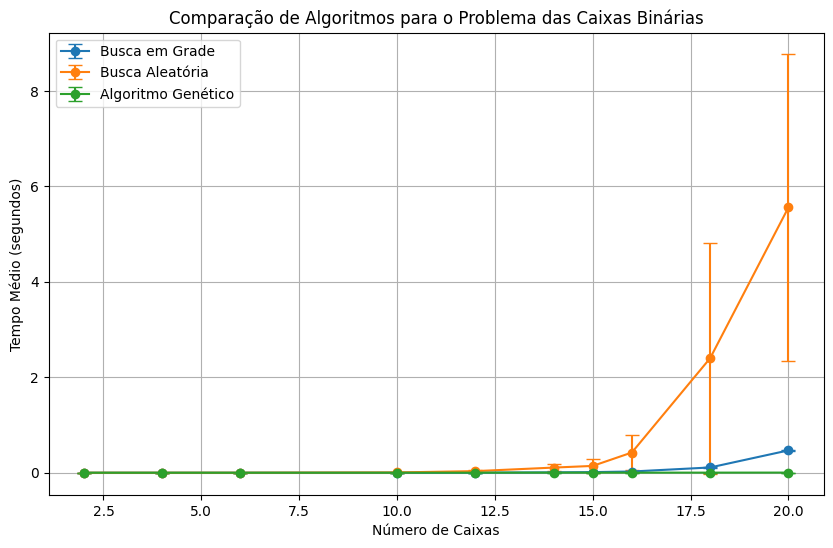

In [11]:
tabela_tempos = {
    'Busca em Grade': tempos_b_grade_media_std,
    'Busca Aleatória': tempos_b_aleatoria_media_std,
    'Algoritmo Genético': tempos_b_ga_media_std
}

def plotar_graficos(tabela_tempos):
    fig, ax = plt.subplots(figsize=(10, 6))
    for metodo, tempos in tabela_tempos.items():
        n_valores = list(tempos.keys())
        medias = [tempos[n]['media'] for n in n_valores]
        stds = [tempos[n]['std'] for n in n_valores]
        ax.errorbar(n_valores, medias, yerr=stds, label=metodo, fmt='-o', capsize=5)

    ax.set_xlabel('Número de Caixas')
    ax.set_ylabel('Tempo Médio (segundos)')
    ax.set_title('Comparação de Algoritmos para o Problema das Caixas Binárias')
    ax.legend()
    plt.grid()
    plt.show()

plotar_graficos(tabela_tempos)

Conseguimos gerar com sucesso o gráfico de comparação! Agora, vamos entender tudo que aconteceu e tirar nossas conclusões.

## Comparação dos graficos e conclusões


### Interpretação dos Resultados por Algoritmo:

* **Busca em Grade**:
    * Apresenta um **crescimento exponencial** no tempo de execução conforme $N$ aumenta.
    * **Justificativa**: Este algoritmo testa todas as $2^N$ combinações possíveis. Para valores pequenos de $N$, o tempo é baixo, mas rapidamente se torna computacionalmente caro, como visto pela inclinação acentuada da curva azul para $N \ge 16$. Este comportamento é típico de algoritmos de busca exaustiva em espaços de busca que crescem exponencialmente.

* **Busca Aleatória**:
    * Também demonstra um aumento no tempo de execução com o crescimento de $N$, sendo este aumento particularmente acentuado e com **alta variabilidade** para $N=20$.
    * **Justificativa**: O algoritmo gera soluções aleatórias até encontrar a ótima. A probabilidade de encontrar a solução $[1, 1, ..., 1]$ em uma tentativa é $1/2^N$, o que implica um número esperado de $2^N$ tentativas. A natureza estocástica do algoritmo explica a grande variabilidade nos tempos (barras de erro), onde algumas execuções podem encontrar a solução por sorte mais rapidamente que outras. Isso também corrige o que foi dito anteriormente sobre a busca aleatória ser mais rápida que a busca em grade; na verdade, ela é mais eficiente em termos de espaço de busca, mas não necessariamente mais rápida em termos de tempo de execução, especialmente para valores altos de $N$.

* **Algoritmo Genético**:
    * Exibe a **melhor performance**, com um tempo de execução consistentemente baixo e próximo de zero para todos os valores de $N$ testados.
    * **Justificativa**: Algoritmos Genéticos utilizam uma população de soluções e operadores como seleção, cruzamento e mutação para convergir para soluções ótimas. Para o Problema das Caixas Binárias, cuja função de avaliação é simples e a direção da otimização é clara (maximizar a soma, ou seja, preencher com '1's), o Algoritmo Genético consegue encontrar a solução ótima de forma muito eficiente, geralmente em poucas gerações. Isso resulta em um tempo de execução que não escala significativamente com $N$ dentro da faixa testada. É como se ele fosse uma busca aleatória guiada, onde a evolução das soluções permite uma exploração mais inteligente do espaço de busca.

### Conclusões:

Os resultados gráficos confirmam as expectativas teóricas:

* A **Busca em Grade** é inviável para $N$ maiores devido à sua natureza exaustiva.
* A **Busca Aleatória**, embora conceitualmente simples, também sofre com a dimensionalidade. Para encontrar a solução ótima global, pode ser pior que a busca em grade. Mas, sempre vale destacar, para se posicionar em um ponto intermediário entre eficiência e simplicidade, a busca aleatória pode ser útil em problemas onde uma solução aproximada é aceitável.
* O **Algoritmo Genético** se destaca como uma heurística eficiente, capaz de encontrar a solução ótima rapidamente para este problema específico, demonstrando sua vantagem em navegar por espaços de busca de forma mais inteligente do que as abordagens anteriores.

## Referências

No geral, não foram utilizadas referências externas para a implementação deste monstrinho, mas é importante ressaltar que o material de aula foi fundamental para a compreensão do problema e das abordagens de otimização.

Segue a referência da inovação utilizado nesse monstrinho, a função `time.perf_counter` da biblioteca `time` do Python, uma função idealizada para medir o tempo de execução de código com alta precisão.

$^{[1]}$ **time — Time access and conversions**. Disponível em: <https://docs.python.org/3/library/time.html#time.perf_counter_ns>. 